In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

import utils

In [2]:
train_data = np.loadtxt(open("data/train_data.csv", "rb"), delimiter=",")
train_labels = np.loadtxt(open("data/train_labels.csv", "rb"), delimiter=",")
test_data = np.loadtxt(open("data/test_data.csv", "rb"), delimiter=",")

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
scaler = StandardScaler()
train_data_stand = scaler.fit_transform(train_data)
test_data_stand = scaler.fit_transform(test_data)

# Training

## Multinomial naive bayes

In [5]:
minmaxscaler = MinMaxScaler()
train_data_stand = minmaxscaler.fit_transform(train_data)
test_data_stand = minmaxscaler.fit_transform(test_data)

In [6]:
clf = MultinomialNB()

In [7]:
clf.fit(train_data_stand, train_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

fak ya

In [8]:
clf.score(train_data_stand, train_labels)

0.52074260829704333

## Gaussian naive bayes

In [6]:
clf = GaussianNB()

In [7]:
clf.fit(train_data_stand, train_labels)

GaussianNB(priors=None)

In [8]:
y_pred = clf.predict(train_data_stand)

In [9]:
clf.score(train_data_stand,train_labels)

0.28925051570020627

In [10]:
sum(np.round(y_pred) == train_labels) / len(train_labels)

0.28925051570020627

## Gaussian process classifier

In [9]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [10]:
clf = GaussianProcessClassifier(1.0 * RBF(1.0))

In [11]:
clf.fit(train_data_stand, train_labels)

GaussianProcessClassifier(copy_X_train=True,
             kernel=1**2 * RBF(length_scale=1), max_iter_predict=100,
             multi_class='one_vs_rest', n_jobs=1, n_restarts_optimizer=0,
             optimizer='fmin_l_bfgs_b', random_state=None,
             warm_start=False)

In [12]:
clf.score(train_data_stand,train_labels)

0.72198028879211551

In [17]:
y_pred = clf.predict(train_data_stand)

In [18]:
sum(np.round(y_pred) == train_labels) / len(train_labels)

0.72198028879211551

In [19]:
pred_GPC = clf.predict(test_data_stand)
pred_GPC_prob = clf.predict_proba(test_data_stand)

In [20]:
utils.make_submission(pred_GPC, 'GPC')
utils.make_submission(pred_GPC_prob, 'GPC', log=True)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_labels, clf.predict(train_data_stand))

Confusion matrix, without normalization
[[2039   83   16   11    0   24    0    5    0    0]
 [ 134  455   12    9    0    6    0    2    0    0]
 [  24   11  288    1    0    2    0    0    0    0]
 [  55   18    2  171    0    7    0    0    0    0]
 [ 144   18   12   15    0   18    0    7    0    0]
 [ 100   11   22   11    0  114    0    2    0    0]
 [  95   13    7   13    0    9    0    4    0    0]
 [ 108    1    1    1    0    1    0   83    0    0]
 [  28   11   30    3    0   18    0    2    0    0]
 [  63    2    4   14    0    1    0    2    0    0]]


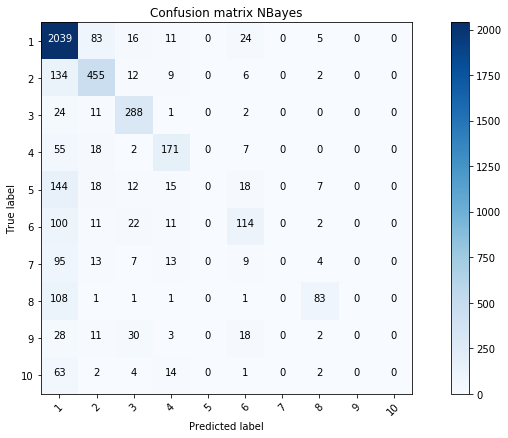

In [15]:
utils.plot_confusion_matrix(cm, title='Confusion matrix NBayes')